# Portfolio Data
This notebook gather the data for a portfolio. In the first case, we consider a portfolio of two equities, market portfolio (SP 500) and risk-free equity (risk-free rate).

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import sys
sys.path.append('../module')
from data_handler import get_monthly_date_format, get_econ_predictors, get_quarterly_date_format
%matplotlib inline

In [2]:
def get_equities_returns(data_freq: str = 'monthly') -> pd.DataFrame:
    """
    Load stock market data from a CSV file and calculate the monthly or quarterly returns
    for the equity index and the risk-free rate.

    Parameters:
    -----------
    data_freq : str, optional
        The frequency of the data in the CSV file. Valid values are 'monthly' and 'quarterly'.
        Default is 'monthly'.

    Returns:
    --------
    pd.DataFrame
        A DataFrame containing the equity returns and the risk-free rate.

    Raises:
    -------
    KeyError
        If an invalid value is passed for the `data_freq` argument.

    """
    date_freq_to_data_func_map = {'monthly': ('../../data/econ_predictors_monthly_2021_Amit_Goyal.csv',
                                              get_monthly_date_format),
                                  'quarterly': ('../../data/econ_predictors_quarterly_2021_Amit_Goyal.csv',
                                                get_quarterly_date_format)}
    try:
        data_path, date_format_func = date_freq_to_data_func_map[data_freq]
    except KeyError:
        raise KeyError("Invalid value for data_freq. Valid values are 'monthly' and 'quarterly'.")
    data = pd.read_csv(data_path, index_col=0)
    data.index = [date_format_func(str(x), {'format': '%Y%m'}) for x in data.index]
    econ_data = data
    equity_price = econ_data['Index'].apply(lambda x: re.sub(r'[^\w\s|.]', '', x)).astype(float).pct_change().dropna()
    rf = econ_data['Rfree'].dropna()
    
    return pd.concat([equity_price, rf], axis=1)


In [7]:
data = get_equities_returns(data_freq = 'monthly')
data.groupby(pd.Grouper(freq='q')).cov()

Index         Rfree
1871Q1 Index  0.000060 -2.415736e-06
       Rfree -0.000002  9.768200e-08
1871Q2 Index  0.000410  8.459460e-06
       Rfree  0.000008  2.254703e-07
1871Q3 Index  0.000306  8.614214e-07
...                ...           ...
2021Q2 Rfree  0.000000  0.000000e+00
2021Q3 Index  0.001807  0.000000e+00
       Rfree  0.000000  0.000000e+00
2021Q4 Index  0.001559 -2.157070e-06
       Rfree -0.000002  3.333333e-09

[1208 rows x 2 columns]

# Volatility of equity

In [3]:
def get_equities_returns_volatility(data_freq: str = 'quarterly') -> pd.DataFrame:
    """
    Load stock market data from a CSV file, calculate the monthly or quarterly returns for the
    equity index and the risk-free rate, and calculate the volatility (standard deviation) of the
    returns for each quarter.

    Parameters:
    -----------
    data_freq : str, optional
        The frequency of the data in the CSV file. Valid values are 'monthly' and 'quarterly'.
        Default is 'quarterly'.

    Returns:
    --------
    pd.DataFrame
        A DataFrame containing the volatility of the equity returns and the risk-free rate for each quarter.

    Raises:
    -------
    KeyError
        If an invalid value is passed for the `data_freq` argument.

    """
    data = get_equities_returns(data_freq = 'monthly')
    data_vol = data.resample('Q').std()
    data_vol.index = data_vol.index.asfreq('M', 'end')
    
    return data_vol


In [69]:
equity_returns_volatility = get_equities_returns_volatility(data_freq='quarterly')
equity_returns_volatility

,Index,Rfree
1871-03,0.007729,0.000313
1871-06,0.020252,0.000475
1871-09,0.017492,0.000238
1871-12,0.039549,0.001306
1872-03,0.014874,0.000899
...,...,...
2020-12,0.067625,0.000000
2021-03,0.027457,0.000000
2021-06,0.023790,0.000000
2021-09,0.042514,0.000000


In [71]:
equity_returns_volatility.to_csv('../../data/equities_returns_volatility_market_rf_quarter_1871_2021.csv')

In [65]:
equity_returns_volatility.index.asfreq('M', 'end')

PeriodIndex(['1871-03', '1871-06', '1871-09', '1871-12', '1872-03', '1872-06',
             '1872-09', '1872-12', '1873-03', '1873-06',
             ...
             '2019-09', '2019-12', '2020-03', '2020-06', '2020-09', '2020-12',
             '2021-03', '2021-06', '2021-09', '2021-12'],
            dtype='period[M]', length=604)

In [64]:
p1 = pd.Period('1871Q1', 'Q-DEC')
p2 = p1.asfreq('M', 'end')

print(p2) 

1871-03


In [55]:
equity_returns_volatility.index[0]

Period('1871Q1', 'Q-DEC')

## Utility of equity return

<AxesSubplot:title={'center':'Utility of Equity Returns with Gamma = 50'}>

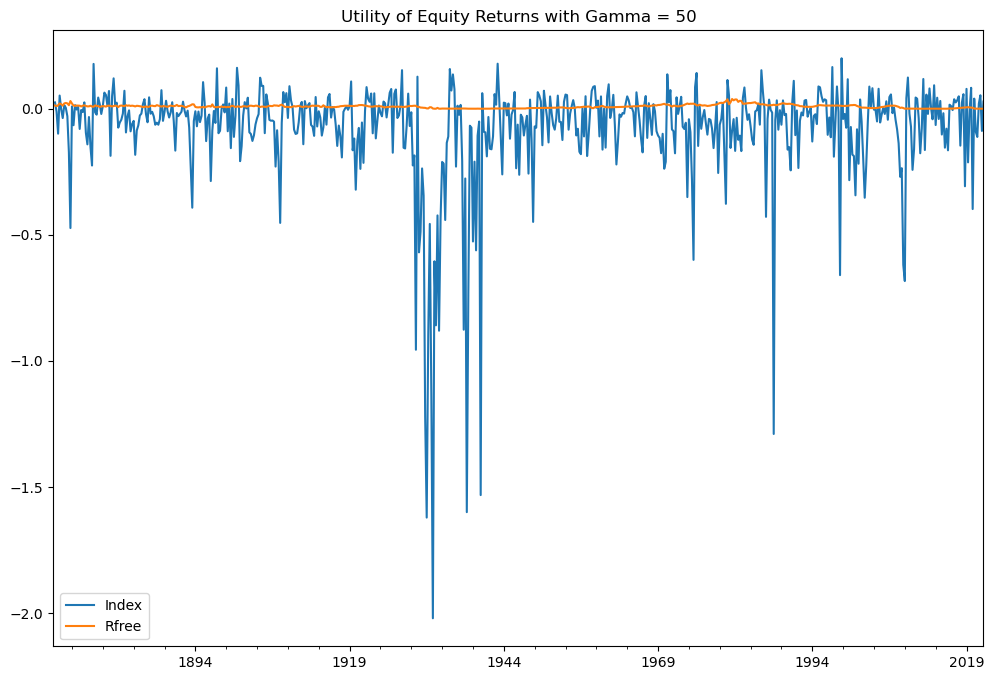

In [52]:
equity_returns = get_equities_returns(data_freq='quarterly').resample('Q').mean()
equity_returns_volatility = get_equities_returns_volatility(data_freq='quarterly')
gamma = 50
utility = equity_returns - gamma * equity_returns_volatility ** 2
utility.plot(figsize=(12, 8), title=f'Utility of Equity Returns with Gamma = {gamma}')


In [16]:
portfolio.to_csv('../../data/portfolio_market_rf_quarter_1871_2021.csv')